In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ablation(tasks, methods, values):
    """
       生成多任务消融实验性能对比柱状图，按 “任务” 横向排列子图，形成 1 行 ×3 列的网格，每个子图独立展示一个任务的消融结果。
       每个子图内对比多个模型变体的性能，直观呈现去除不同模块对模型性能的影响。 

        参数：
        tasks: 列表，任务名称的列表
        methods: 列表， 模型变体名称的列表，每个方法对应柱状图中的一个柱子
        values:字典，键为任务名称（与 tasks 对应），值为该任务下各模型变体的性能值列表（长度与 methods 一致）。

        配色：
        colors = ['#43978F', '#9EC4BE', '#FFB77F', '#59A14F', '#4E79A7', '#F19685', '#F6C957', '#E15759']
        
    """
    index = np.arange(len(methods))  # 方法数量

    bar_width=0.7
    
    # 自定义颜色
    colors = ['#43978F', '#9EC4BE', '#FFB77F', '#59A14F', '#4E79A7', '#F19685', '#F6C957', '#E15759']

    # 设置风格
    plt.style.use('default')
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.family'] = 'sans-serif'

    # 创建图表
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

    # 为每个任务创建图表
    y_limits = [(0.8, 1.0), (0.4, 0.75), (0.3, 0.74)]  # 不同任务的y轴范围
    y_ticks = {
        'Check-in': np.arange(0.8, 1.01, 0.02),  # 手动设置y轴刻度
        'Crime': np.arange(0.4, 0.76, 0.05),
        'Service call': np.arange(0.3, 0.75, 0.04)
    }
    i = 0
    for ax, task, ylim in zip(axs, tasks, y_limits):
        method_values = values[task]
        bars = ax.bar(index, method_values, bar_width, color=colors)

        # 自定义
        ax.set_ylim(ylim)
        ax.set_yticks(y_ticks[task])  # 手动设置y轴刻度
        ax.set_xticks([])  # 去掉x轴刻度

        if i == 0:
            ax.set_ylabel(r'$R^2$', fontsize=24)
            i += 1
        ax.tick_params(axis='y', labelsize=16)

        # 在底部添加标题
        ax.set_xlabel(task, fontsize=24)

        # 移除除左边框外的所有边框
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)

        # 关闭网格
        ax.grid(False)

    # 在图表上方添加单个图例
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(methods))]
    fig.legend(handles, methods, loc='upper center', ncol=len(methods), bbox_to_anchor=(0.5, 1.0),
               fontsize=22, columnspacing=1, frameon=False)

    # 调整布局并保存
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, wspace=0.2)  # 调整上边距以适应图例，增加子图之间的空间
    plt.savefig('ablation_Chi.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()

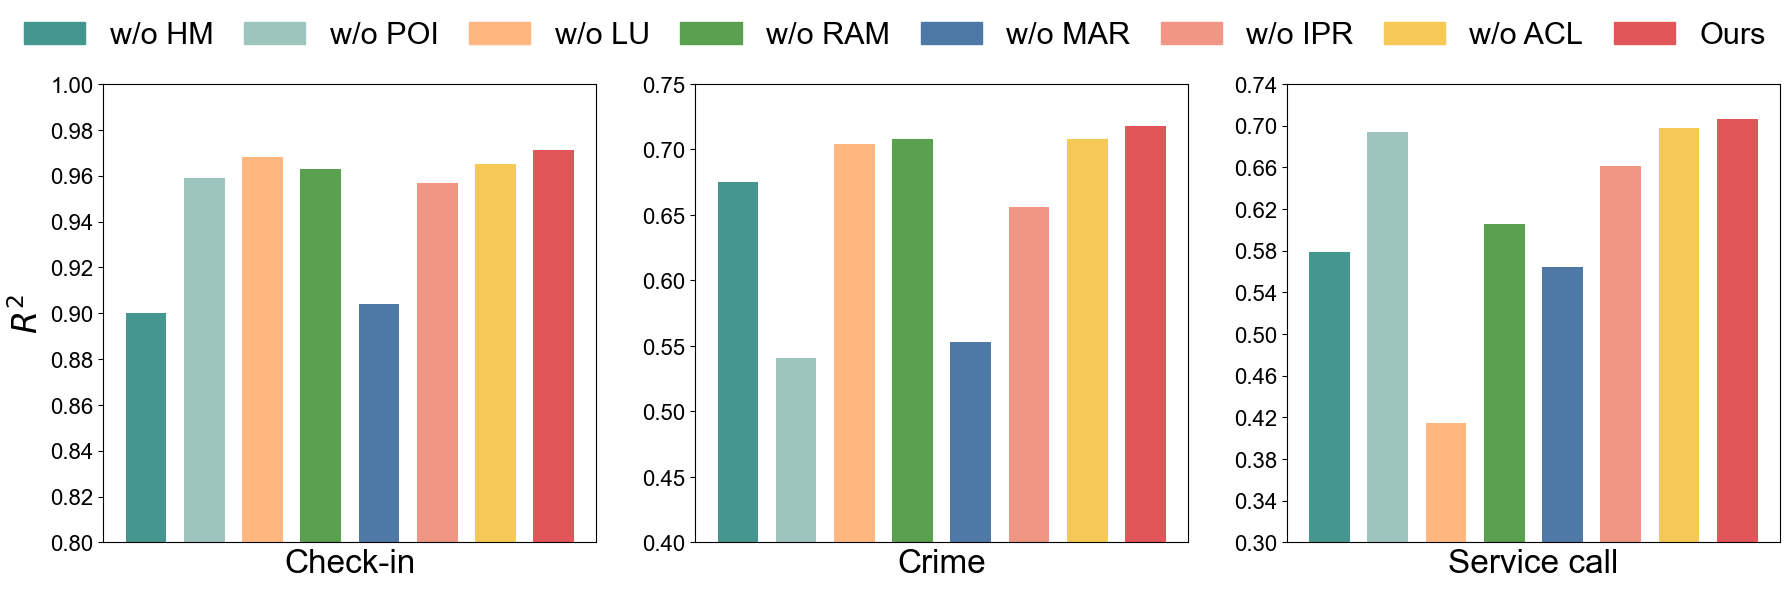

In [3]:
# 示例
#任务
tasks = ['Check-in', 'Crime', 'Service call']
methods = ['w/o HM', 'w/o POI', 'w/o LU', 'w/o RAM', 'w/o MAR', 'w/o IPR', 'w/o ACL', 'Ours']
values = {
    'Check-in': [0.9, 0.959, 0.968, 0.963, 0.904, 0.957, 0.965, 0.971],
    'Crime': [0.675, 0.541, 0.704, 0.708, 0.553, 0.656, 0.708, 0.718],
    'Service call': [0.579, 0.694, 0.415, 0.606, 0.564, 0.661, 0.698, 0.706]
}

bar_width = 0.7
plot_ablation(tasks, methods,values)